<H2>Notes from Predictive Analytics with TensorFlow - Ch. 3 and 7 - Packt</H2>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<H3>Chapter 3: From Data to Decisions - Getting Started with TensorFlow</H3>

<H4>General Topics:</H4>
    
<ul>
    <li>TensorFlow computational graph</li>
    <li>TensorFlow programming model</li>
    <li>TensorFlow data model</li>
    <li>Visualizing the TensorBoard</li>
    <li>Getting started with TensorFlow: Linear Regression and beyond</li>
</ul>
     

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h4>TensorFlow Computational Graph</h4>

TensorFlow is an open source framework from Google for 'scientific and numerical computation based on dataflow graphs' that provides an execution model for deep learning and predictive analytics. 

Technically, a dataflow graph is a 'computational graph.' A computational graph is a directed graph where the nodes correspond to mathematical operations and the edges correspond to the data and control that flow between the nodes. They are a way of expressing and evaluating mathematical expressions (from simple to complex).  

The data (values) that are fed into the nodes and come out of the nodes are called <i>tensors</i>.  Hence the name Tensorflow.
At their base, tensors are multi-dimensional arrays that encompass scalars (rank 0), vectors (rank 1), matrices (rank 2), as well arrays of a higher rank (3 or more). 

The main components of TensorFlow include:

<ol>
    <li><i>Variables</i>: Used to contain values for the weights and bias between TensorFlow sessions.</li>
    <li><i>Tensors</i>: A set of values that pass in between nodes.</li>
    <li><i>Placeholders</i>: Is used to send data between the program and the TensorFlow graph.</li>
    <li><i>Session</i>: When a session is started, TensorFlow automatically calculates gradients for all the operations in the graph and use them in a chain rule.In fact, a session is invoked when the graph is to be executed.</li>
</ol>


<h4>TensorFlow Programming Model</h4>

The programming model is generally divided into 4 phases:

<ol>
    <li>Construction of the computations graph that involves some operations on tensors.</li>
    <li>Create a session.</li>
    <li>Running a session, that is performed for the operations defined in the graph.</li>
    <li>Computation for data collection and analysis.</li>
</ol>

TensorFlow <i>Session Objects</i> (i.e. tf.Session) provide an environment encapsulates the computational graph, executing all the specified operations and evaluating the associated Tensor objects.

The following provide simple examples illustrating the encapsulation and execution process. The first example relies on Tensor <i>constants</i> to specify key values, while the second utilizes Tensor <i>placeholders</i> to accomplish the same task.  Placeholders require specification of the data type, the shape of the tensor, and an optional name. In both instances you can think of constants and placeholders much like the 'type' specifications in other languages (e.g. in Java a constant would be declared as 'final int x = 8;' or for placeholders 'float x;' where x is 0.0 by default).

In [4]:
# Simple example multiplying 2 numbers x and y

# While you wouldn't use this to simply multiply 2 numbers,
# it serves to highlight key elements in the programming 
# of a computational graph

import tensorflow as tf

x = tf.constant(8)
y = tf.constant(9)
z = tf.multiply(x,y)

sess = tf.Session()
out_z = sess.run(z)
sess.close()

print('The multiplication of x and y: %d' % out_z)

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

The multiplication of x and y: 72


C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1ty

In [5]:
# same example with improved efficients utilizing tf.placeholders

import tensorflow as tf

with tf.Session() as sess:
    x = tf.placeholder(tf.float32, name = 'x')
    y = tf.placeholder(tf.float32, name = 'y')
    z = tf.multiply(x,y)    
    z_output = sess.run(z, feed_dict={x:8, y:9})
sess.close()

print(z_output)

72.0


<h4>TensorFlow Data Model</h4>

The data model in TensorFlow is represented by tensors, which are essentially multidimensional numerical arrays. A more formal definition of the concept of <i>tensors</i> is provided by Wikipedia (https://en.wikipedia.org/wiki/Tensor):

"Tensors are geometric objects that describe linear relations between geometric vectors, scalars, and other tensors. Elementary examples of such relations include the dot product, the cross product, and linear maps. Geometric vectors, often used in physics and engineering applications, and scalars themselves are also tensors."

On the surface, tensors and 'numpy arrays' appear to share a number of similarities. However, they are different in large part because numpy arrays yield values without having to encapsulate them in a 'session.' The examples that follow highlight the differences and show how numpy arrays can be used as a starting point for tensors.

In [6]:
import numpy as np

X = [[2.0, 4.0],[6.0, 8.0]]
Y = np.array([[2.0, 4.0],[6.0, 8.0]], dtype=np.float32)
Z = tf.constant([[2.0, 4.0],[6.0, 8.0]])

print(type(X))
print(type(Y))
print(type(Z))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [7]:
# while there are differences, all 3 are easily converted to tensors

t1 = tf.convert_to_tensor(X, dtype=tf.float32)
t2 = tf.convert_to_tensor(Z, dtype=tf.float32)
t3 = tf.convert_to_tensor(Z, dtype=tf.float32)

print(type(t1))
print(type(t2))
print(type(t3))

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<h4>Tensor: Key Features -- 'rank','shape', and 'type'</h4>

<h5>Rank</h5>

Each tensor is described by a unit of dimensionality called 'rank'.  It specifies the number of dimensions of the tensor.  Rank is also known as the 'order' or 'n-dimensions' of a tensor. A rank zero tensor is a scalar, a rank one tensor is a vector, a rank two tensor is a matrix, higher ranks involve nested matrices. Each of these is illustrated below:

In [8]:
import tensorflow as tf

scalar1 = tf.constant(100) # rank 0
vector1 = tf.constant([1,2,3,4,5]) # rank 1
matrix1 = tf.constant([[1,2,3],[4,5,6]]) # rank 2
cube_matrix1 = tf.constant([[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]) # rank 3
print(scalar1.get_shape())
print(vector1.get_shape())
print(matrix1.get_shape())
print(cube_matrix1.get_shape())

()
(5,)
(2, 3)
(3, 3, 1)


<h5>Shape</h5>

The shape of a tensor is it's number of rows and columns. The illustrations below illustrate the concept of shape and it's relation to rank.

In [9]:
scalar1.get_shape()
vector1.get_shape()
matrix1.get_shape()
cube_matrix1.get_shape()

TensorShape([])

TensorShape([Dimension(5)])

TensorShape([Dimension(2), Dimension(3)])

TensorShape([Dimension(3), Dimension(3), Dimension(1)])

<h5>Data Type</h5>

The third key feature of a tensor is it's 'data type'.  The following table summarizes the types:

<table align="left">
    <tr><th>Type</th><th>TensorFlow</th></tr>
    <tr><td>floating point</td><td>tf.float32, tf.float64</td></tr>
    <tr><td>integers</td><td>tf.int8, tf.int16, tf.int32, tf.int64</td></tr>
    <tr><td>unsigned integers</td><td>tf.uint8, tf.unit16</td></tr>
    <tr><td>strings</td><td>tf.string</td></tr>
    <tr><td>booleans</td><td>tf.bool</td></tr>
    <tr><td>complex numbers</td><td>tf.complex64, tf.complex128</td></tr>
    <tr><td>integer with quantuized ops</td><td>tf.qint8, tf.qint32, tf.quint8</td></tr>
</table>



When placeholders and variables are defined, the type is specified. With constants it is usually assumed.  In any case, you can see the type when the tensor is printed (along with the name and shape).

In [10]:
x = tf.constant(8)
y = tf.placeholder(tf.float32, name = 'y')
z = tf.Variable(0.0, dtype=tf.float64)
print(x)
print(y)
print(z)

Tensor("Const_8:0", shape=(), dtype=int32)
Tensor("y_1:0", dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float64_ref>


<h5>Building Tensors from Numpy Arrays</h5>

In [11]:
# creating a constant from numpy (np) array

import tensorflow as tf
import numpy as np

tensor_1d = np.array([1,2,3,4,5,6,7,8,9,10]) #np array
tensor_1d = tf.constant(tensor_1d)

with tf.Session() as sess:
    print(tensor_1d)
    print (tensor_1d.get_shape())
    print (sess.run(tensor_1d))
# Finally, close the TensorFlow session when you're done
sess.close()

Tensor("Const_9:0", shape=(10,), dtype=int32)
(10,)
[ 1  2  3  4  5  6  7  8  9 10]


In [12]:
# creating a Variable from np array

import tensorflow as tf
import numpy as np

tensor_2d = np.array([(1,2,3),(4,5,6),(7,8,9)])
tensor_2d = tf.Variable(tensor_2d)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(tensor_2d)
    print (tensor_2d.get_shape())
    print (sess.run(tensor_2d))
    
sess.close()

<tf.Variable 'Variable_1:0' shape=(3, 3) dtype=int32_ref>
(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [13]:
# interactive session provides convenient way to keep default session open

import tensorflow as tf
import numpy as np

interactive_session = tf.InteractiveSession()

tensor = np.array([1,2,3,4,5])
tensor = tf.constant(tensor)
print(tensor.eval())

interactive_session.close()

[1 2 3 4 5]


In [14]:
# using tf.convert_to_tensor to define a tensor object

import tensorflow as tf
import numpy as np

tensor_3d = np.array([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
[[9, 10, 11], [12, 13, 14], [15, 16, 17]],
[[18, 19, 20], [21, 22, 23], [24, 25, 26]]])

tensor_3d = tf.convert_to_tensor(tensor_3d, dtype=tf.float64)

with tf.Session() as sess:
    print(tensor_3d)
    print(tensor_3d.get_shape())
    print(sess.run(tensor_3d))
    
sess.close()

Tensor("Const_11:0", shape=(3, 3, 3), dtype=float64)
(3, 3, 3)
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]]


In [15]:
# Variables are TensorFlow objects used to hold and update parameters
# They must be initialized and can also be saved and restored.

import tensorflow as tf

value = tf.Variable(0, name='value')

one = tf.constant(1)
new_value = tf.add(value, one)
update_value = tf.assign(value, new_value)
initialize_var = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(initialize_var)
    print(sess.run(value))
    for _ in range(5):
        sess.run(update_value)

sess.close()


0


1

2

3

4

5

In [16]:
# To 'fetch' the outputs of operations, execute the graph by calling run() on the
# session object and pass in the tensors to retrieve. This can be done for single
# or multiple tensor nodes

import tensorflow as tf

constant_A = tf.constant([100.0])
constant_B = tf.constant([300.0])
constant_C = tf.constant([3.0])

sum_ = tf.add(constant_A,constant_B)
mul_ = tf.multiply(constant_A,constant_C)

with tf.Session() as sess:
    result = sess.run([sum_,mul_])
    print(result)

sess.close()


[array([400.], dtype=float32), array([300.], dtype=float32)]


<h4>Feeds and Placeholder</h4>

There are four methods of getting data into a TensorFlow Program:

<ul>
    <li><i>Dataset API</i> -- Build complex input pipelines from simple and reusable pieces from distributed file systems. Two new abstractions for feedable sets are <i>tf.contrib.data.Dataset</i> and <i>tf.contrib.data.Iterator</i>.</li>
    <li><i>Feeding</i> -- Allows injecting data into any Tensor</li>
    <li><i>Reading from Files</i> -- Develop input pipeline using Python's built-in file reading methods.</li>
    <li><i>Preloaded Data</i> -- For small datasets use either constants or variables in TensorFlow graph.</li>
</ul>

In [17]:
# Feeding array of random numbers

import tensorflow as tf
import numpy as np

a = 3
b = 2

x = tf.placeholder(tf.float32,shape=(a,b))
print(x)
y = tf.add(x,x)

data = np.random.rand(a,b)

sess = tf.Session()
print (sess.run(y,feed_dict={x:data}))

sess.close()

Tensor("Placeholder:0", shape=(3, 2), dtype=float32)
[[0.6612202  1.9433968 ]
 [0.43015137 1.8572755 ]
 [1.2412037  1.9103651 ]]


<h4>Getting Started: Linear Regression and Beyond</h4>

Similiar to the statistical realm, linear regression can also be used in predictive modeling to explore the relationship between a dependent variable yi, and interdependent variable xi, and a random term b. In this instance the model is as follows:

y = W\*x + b

To illustrate the way this works, we'll being with a simple Python program for creating data in a 2D space. Next will use TensorFlow to find the line that best fits the data.

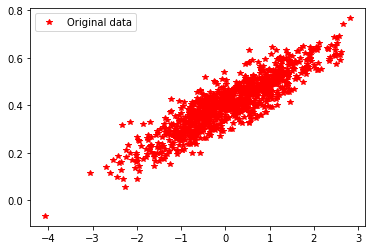

In [18]:
# Import libraries (Numpy, matplotlib)
import numpy as np
import matplotlib.pyplot as plt

# Create 1000 points following a function y=0.1 * x + 0.4 (i.e. y \= W* x + b) with some normal random distribution:

num_points = 1000

vectors_set = []

for i in range(num_points):
    W = 0.1 # W
    b = 0.4 # b
    x1 = np.random.normal(0.0, 1.0)
    nd = np.random.normal(0.0, 0.05)
    y1 = W * x1 + b
    # Add some impurity with some normal distribution -i.e. nd:
    y1 = y1+nd
    # Append them and create a combined vector set:
    vectors_set.append([x1, y1])
    
# Separate the data point across axises:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

# Plot and show the data points in a 2D space
plt.plot(x_data, y_data, 'r*', label='Original data')
plt.legend()
plt.show()

Given this data the objective is to create a computational graph 'W\*x_data + b' that best predicts the y_data. While we know behind the scenes that the data were created using W = 0.1 and b = 0.4, the goal is to derive optimum values for W and b that reduce the error between the actual y values and the predicted y values. A standard way to solve optimization problems of this sort is to iterate through each of the data points and adjust the value of W and b with each iteration in order to prove the precision of the answer. Of course, how the precision is determined depends on the 'cost function' used to measure the distance between the real data points and the estimated ones.  Here, we use mean squared error (MSE).

In [19]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.6)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(16):
    sess.run(train)
    print(i, sess.run(W), sess.run(b), sess.run(loss))
    


0 [0.09891336] [0.4639176] 0.006610601
1 [0.09152313] [0.38830972] 0.002864642
2 [0.1014565] [0.40421554] 0.0026629495
3 [0.09720103] [0.3999803] 0.0026429892
4 [0.09875043] [0.4012789] 0.002640737
5 [0.09821213] [0.40085477] 0.0026404785
6 [0.09839628] [0.40099674] 0.0026404487
7 [0.09833361] [0.4009488] 0.0026404453
8 [0.09835491] [0.40096503] 0.0026404448
9 [0.09834767] [0.40095952] 0.002640445
10 [0.09835013] [0.4009614] 0.0026404448
11 [0.0983493] [0.40096077] 0.0026404448
12 [0.09834958] [0.40096098] 0.0026404448
13 [0.09834948] [0.4009609] 0.0026404448
14 [0.09834952] [0.40096092] 0.0026404448
15 [0.0983495] [0.40096092] 0.0026404448


0 [0.41095603] [0.59201914] 0.1521923


Text(0.5, 0, 'X')

(-2, 2)

(0.1, 0.6)

Text(0, 0.5, 'Y')

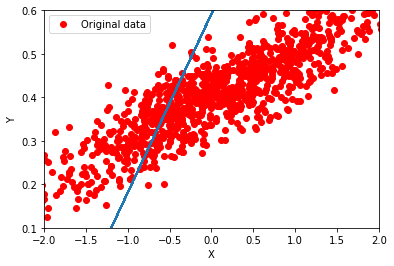

15 [0.09834948] [0.4009609] 0.0026404448


Text(0.5, 0, 'X')

(-2, 2)

(0.1, 0.6)

Text(0, 0.5, 'Y')

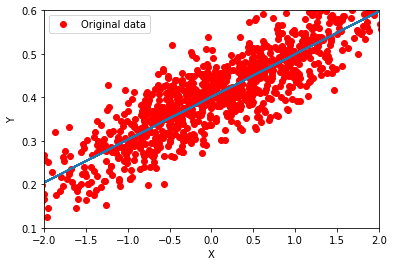

In [20]:
# Refined code for more complete analysis

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#tf.name_scope organize things on the tensorboard graph view

with tf.name_scope("LinearRegression") as scope:
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="Weights")
    b = tf.Variable(tf.zeros([1]))
    y = W * x_data + b
    
# Define a loss function that takes into account the distance between the prediction and our dataset

with tf.name_scope("LossFunction") as scope:
    loss = tf.reduce_mean(tf.square(y - y_data))
    optimizer = tf.train.GradientDescentOptimizer(0.6)
    train = optimizer.minimize(loss)

# Annotate loss, weights, and bias (Needed for tensorboard)

loss_summary = tf.summary.scalar("loss", loss)
w_ = tf.summary.histogram("W", W)
b_ = tf.summary.histogram("b", b)

# Merge all the summaries

merged_op = tf.summary.merge_all()
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Writer for TensorBoard (replace with our preferred location
# writer_tensorboard = tf.summary.FileWriter('/ LR/', sess.graph_def)

for i in range(16):
    sess.run(train)
    # printing and plotting first (0) and last(15) runs to see
    # shift in linear fit
    if i == 0 or i == 15:
        print(i, sess.run(W), sess.run(b), sess.run(loss))
        plt.plot(x_data, y_data, 'ro', label='Original data')
        plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
        plt.xlabel('X')
        plt.xlim(-2, 2)
        plt.ylim(0.1, 0.6)
        plt.ylabel('Y')
        plt.legend()
        plt.show()

# Finally, close the TensorFlow session when you're done
sess.close()

<h4>Summary Notes</h4>

TensorFlow is designed to make the predictive analytics through the machine and deep learning easy for everyone, but using it does require understanding some general principles and algorithms. In summary, here is a brief recap of the key concepts of TensorFlow explained in this chapter:

<ul>
    <li>Graph: each TensorFlow computation can be represented as a set of dataflow graphs where each graph is built as a set of operation objects. There are three
core graph data structures:
    <ol>
        <li>tf.Graph</li>
        <li>tf.Operation</li>
        <li>tf.Tensor</li>
    </ol>
    </li>
    <li>Operation: A graph node takes tensors as input and also produces a tensor
as output. A node can be represented by an operation object for performing
units of computations such as addition, multiplication, division, subtraction
or more complex operation.</li>
    <li>Tensor: Tensors are like high-dimensional array objects. In other words, they
can be represented as edges of a dataflow graph but still they don't hold any
value produced out of an operations.</li>
    <li>Session: A session object is an entity that encapsulates the environment
in which operation objects are executed for running calculations on the
dataflow graph. As a result, the tensors objects are evaluated inside the
run() or eval() invocation</li>
</ul>


<H3>Chapter 7: Using Deep Neural Networks for Predictive Analytics</H3>

Artificial Neural Networks (ANNs) are at the very core of deep learning (DL). They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning (ML) tasks by stacking multiple ANNs together. These multiple stacked ANNs are called Deep Neural Networks (DNNs). Using these, we can build very robust and accurate predictive models for predictive analytics.

<H4>General Topics:</H4>
    
<ul>
    <li>Deep learning in the big data era</li>
    <li>Deep Neural Networks</li>
    <li>DNN Architectures</li>
    <li>Multilayer perceptron</li>
    <li>Using multilayer perceptron for predictive analytics</li>
</ul>

Note: other topics are covered but not included in these notes:

<H4>Deep Learning for Better Predictive Analytics</H4>

Simple machine learning methods that were used in normal sized data analysis won't be effective anymore and should be ubstituted by DNN learning methods. Although classical machine learning techniques allow researchers to identify groups
or clusters of related variables, the accuracy and effectiveness of these methods diminishes for large and high–dimensional datasets, such as whole human genomes.

On the other hand, deep learning can make better representations of large–scale datasets to build models to learn these representations very extensively. DL is a branch of ML based on a set of algorithms that attempt to model high-level
abstractions in data.

Machine learning versus deep learning
<ul>
    <li>Data dependencies: Deep learning algorithms don't perform that well with small amount data.</li>
    <li>Hardware dependencies: Deep learning algorithms heavily depend on high-end machines with GPU, especially when lots of scientific computing and precision is important.</li>
    <li>Feature engineering: Deep learning algorithms learn high-level features from data rather than from handcrafted features.</li>
    <li>Problem solving approach: Deep learning advocates to solve the problem end-to-end.</li>
    <li>Execution time: A deep learning algorithm with so many parameters and features takes a long time to train.</li>
</ul>

<h4>Artificial Neural Networks</h4>

Biological neurons inspired artificial neural networks (ANNs). The perceptron is one of the simplest ANN architectures, called a linear threshold unit (LTU).  In ANNs the inputs are now numbers and each input connection is associated with a weight. The LTU computes a weighted sum of its inputs.

z = w1x1 + w2x2 + ... +wnxn = WT * X  (where WT is the transpose of W)

This then apoplies a step function to that sum and outputs the result hw(z) = step (z) = step(WT.X)

Similar to logistic regression, or 'Support Vector Machines' (SVMs), a single LTU can be used for simple linear and binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class. However, training an LTU is not an easy job, but training such a simple model means finding the right values for w0, w1, and w2. 

A perceptron is simply composed of a single layer of LTUs, with each neuron connected to all the inputs. These connections are often represented using special pass–through neurons called 'input neurons': they just output whatever input they are fed. Moreover, an extra bias feature is generally added (x0 = 1). This bias feature
is typically represented using a special type of neuron called a 'bias neuron', which just outputs 1 all the time.

Since the decision boundary of each output neuron is linear, perceptrons are incapable of learning complex patterns. However, if the training instances are linearly separable, research has shown that this algorithm will converge to a solution called "perceptron convergence theorem."

<h4>Deep Neural Networks</h4>

Deep learning is a term to differentiate an artificial neural network of multiple hidden layers from the simpler neural network that only consists of a small number of layers. Each layer consists of a certain number of neurons shown asvcircles, which correspond to certain types of activation functions, such as identity or logistic functions. In short an ANN with two or more hidden layers is called a DNN.

<h4>DNN Architectures</h4>

The basic structure of DNNs consists of an input layer, multiple hidden layers, and an output layer. Once the input data is given to the DNNs, output values are computed sequentially along the layers of the network. At each layer, the input vector comprising the output values of each unit in the layer below is multiplied by the weight vector for each unit in the current layer to produce the weighted sum. Then, a nonlinear function, such as a sigmoid, hyperbolic tangent, or 'rectified linear unit (ReLU)', is applied to the weighted sum to compute the output values of the layer.

The computation in each layer transforms the representations in the layer below into slightly more abstract representations. Based on the types of layers used in DNNs and the corresponding learning method, DNNs can be classified as multilayer
perceptrons, which are based on feedforward neural network (FFNN), Staked Auto-Encoders (SAEs), or deep belief networks.

An MLP has a similar structure to the usual neural networks but includes more stacked layers. It is trained in a purely supervised manner that uses only labeled data. Since the training method is a process of optimization in high–dimensional
parameter space, DMLP is typically used when a large number of labeled data are available.

SAE and DBN use AEs and RBMs as building blocks of the architectures, respectively. The main difference between these and MLPs is that training is executed in two phases: unsupervised pretraining and supervised fine-tuning.

<h4>Multilayered Perceptrons (MLP)</h4>

A multilayer perceptron is a feedforward neural network, which means that it is the only connection between neurons from different layers. More specifically, an MLP is composed of one (pass through) input layer, one or more layers of LTUs, called
'hidden layers', and one final layer of LTUs called the output layer. Every layer except the output layer includes a bias neuron and is connected to the next layer as a fully connected bipartite graph.

<h4>Training an MLP</h4>

An MLP was trained successfully using the back propagation training algorithm for the first time in 1986. However, nowadays the optimized version of this algorithm is called gradient descent (using reverse mode auto diff). 

During the training phase, for each training instance, the algorithm feeds it to the network and computes the output of every neuron in each consecutive layer.

Then it measures the network's output error, and it computes how much each neuron in the last hidden layer contributed to each output neuron's error. 

It then proceeds to measure how much of these error contributions came from each neuron in the previously hidden layer, and so on, until the algorithm reaches the input layer. This reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward in the network.

More technically, the calculation of the gradient of the cost function for each layer is done by the 'back propagation method'. The idea of gradient descent is to have a cost function that shows the difference between the predicted outputs of some neural
network with the actual output.

There are several known types of the cost function, such as the squared error function and the log-likelihood function, and the choice for this cost function can be based on many factors. The gradient descent method optimizes the network's weight by minimizing this cost function, and the steps are as follows: 

<ul>
    <li>Weight initialization</li>
    <li>Calculation of neural networks predicted output (forward propogation step)</li>
    <li>Calculation of cost/loss function; some common cost/loss functions include the log-likelihood function and squared error function</li>
    <li>Weight update based on the current weight and the gradient of the cost/loss function</li>
    <li>Iteration of steps 2-5 until the cost function reaches a certain threshold or after a certain amount of iteration</li>
</ul>

<h4>Using MLPs</h4>

An MLP is a supervised neural network that is commonly used for classification and regression problems, although its implementation in image and video data has been gradually replaced by Convolutional Neural Networks. Using MLPs, both the binary and multiclass classification problems can be solved.

However, for multiclass classification task and training, the output layer is typically modified by replacing the individual activation functions by a shared softmax function. The output of each neuron corresponds to the estimated probability of the corresponding class. Note that the signal flows only from the input to output but in one direction, so this architecture is an example of a FFNN.

One important concept that is essential to know and try tuning is the hyperparameters in DNNs, which is not straightforward but needs extensive research.

<h4>DNN Performance Analysis</h4>

For classification problems, performance can be measured via a confusion matrix.  Take prediction of cancer (yes, no or 1,0). Based on comparison of predicted versus labeled value, the results could be:

Actual, Predicted, Outcome
yes, yes - true positive (TP)
yes, no - false negative (FN)
no, yes - false positive (FP)
no, no - true negative (TN)

Measures

Accuracy = (TP+TN)/(TP+FP+FN+TN) = correct predictions out of total predictions
Precision = TP/(TP+FP) = correct positives out of total positive predictions
Recall = TP/(TP+FN) = correct predicted positives out of actual positives
F1 = harmonic mean of precision and recall = 2 x (Precision X Recall)/ (Precision + Recall)

For regression, most common metric is 'root mean squared error (RMSE)' and the 'coefficient of determination R2 Score.'

RMSE = sqrt((sum(y_pred-y_actual)^2)/n)

r2 = 1 - (sum(y_actual-y_predicted)^2)/(sum(y_actual-y_mean)^2)

Main difference is that R2 is scaled between 0 and 1, while RMSE isn't.

<h4>Fine-Tuning DNN Hyperparameters</h4>

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in
each layer, the weight initialization logic, dropout keep probability, and so on.

How do you know what combination of hyperparameters is the best for your task? For the DNNs there are many hyperparameters to tune, and since training a neural network on a large dataset takes a lot of time, you will only be able to explore a tiny part of the hyperparameter space in a reasonable amount of time. Here are some insights that can be followed.

<ul>
    <li>Number of hidden layers: for many problems, you can start with just one or two hidden layers, and it will
work just fine using two hidden layers with the same total amount of neurons in roughly the same amount of training time.
For more complex problems, you can gradually ramp up the number of hidden layers until you start overfitting the training set. </li>
    <li>Number of neurons per hidden layer: The of neurons in the input and output layer is determined by the type of input and output your task requires. Just like the number of layers,you can try increasing the number of neurons gradually until the network starts overfitting.</li>
    <li>Activation functions: In most cases you can use the ReLU activation function in the hidden layers. For output layer the softmax activation function is generally good choice for classification tasks. For regression you ca simply use no activation function at all.</li>
    <li>Weight and biases initialization:
        <ul>
            <li>Do not do all zero initialization.</li>
            <li>Small random numbers: It is also possible to initialize the weights of the neurons to small numbers but not identically zero. Alternatively, it is also possible to use small numbers drawn from a uniform distribution.</li>
            <li>Initializing the biases: It is possible and common to initialize the biases to be zero since the asymmetry breaking is provided by the small random numbers in the weights. Setting the biases to a small constant value such as 0.01 for all biases ensures that all ReLU units can propagate some gradient. However, it neither performs well nor does consistent improvements. Therefore, sticking with zero is recommended.</li>
        </ul>
    <li>Regularization
        <ul>
            <li>L2 Regularization: probably the most common form of regularization. Using the gradient descent parameter update, L2 regularization signifies that every weight will be decayed linearly towards zero.</li>
            <li>L1 Regularization: For each weight w we add the term λ/w/ to the objective. However, it is also possible to combine L1 and L2 regularization to achieve elastic net regularization.</li>
            <li>Max-norm Constraints: Issued to enforce an absolute upper boundary on the magnitude of the weight vector for each hidden layer neuron. Projected gradient descent is then can be used further to enforce the constraint.</li>
            <li>Dropout: While working with DNNs, we need another placeholder for dropout, which is a hyperparameter to be tuned and the training time but not the test time. It is implemented by only keeping a neuron active with some probability say p less than 1.0, or setting it to zero otherwise. The idea is to use a single neural net at test time without dropout. The weights of this network are scaled-down versions of the trained weights. If a unit is retained with dropout_keep_prob less than 1.0 during training, the outgoing weights of that unit are multiplied by p at test time.</li>
</ul>

<h4>Overall Workflow</h4>
        
<ol>
    <li>Start</li>
    <li>Data Preprocessing</li>
    <li>Design Neural Network</li>
    <li>Train Neural Network</li>
    <li>Test and Analyze Neural Network</li>
    <li>Is Performance Satisfying?</li>
    <li>No -- Update Hyperparameters</li>
    <li>Yes -- End</li>
</ol>
        

<h4>Using MLPs for Predictive analytics</h4>

Example: Bank Marketing Datasets
        
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess whether the product (bank term deposit) would be ("yes") or would not be ("no") subscribed. The target is to use MLP to predict whether the client will subscribe a term deposit (variable y)—that is, a binary classification problem.

Dataset Description

There are two sources that I would like to acknowledge. This dataset was used in a research paper published by Moro et al, A Data-Driven Approach to Predict the Success of Bank Telemarketing, Decision Support Systems, Elsevier, June 2014. Later on, it was donated to the UCI Machine Learning repository that can be downloaded from
        
        https://archive.ics.uci.edu/ml/datasets/bank+marketing.
        
According to the dataset description, there are four datasets. The first is the complete set:
        
bank-additional-full.csv: This includes all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
        
There are 21 attributes in the dataset. The independent variables, that is, features can be further categorized as bank client related data (attributes 1 to 7), related to the last contact with the current campaign (attributes 8 to 11), other attributes (attributes 12 to 15), and social and economic context attributes (attributes 16 to 20). The dependent variable is specified by y, the last attribute (21). Included: age, marital, educatioin, default (credit), housing, loan, contact, month, day_of_week, duration, campaign (number of contacts), pdays, previous, poutcome, emp_var_rate, cons_price_indx, cons_conf_indx, euribor3m, nr_employed, y (client subscribed to a term deposit).
        


In [21]:
# Preprocessing - mix of categorical and numerical values. Also, outcome is categorical.
# Need to convert them to numerical

import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load data
data = pd.read_csv('bank-additional-full.csv', sep = ",")
# Variables names
var_names = data.columns.tolist()

# Categorical vars
categs = ['job','marital','education','default','housing','loan','contact','month','day_of_week','duration','poutcome','y']
# Quantitative vars
quantit = [i for i in var_names if i not in categs]

# Get dummy variables for categorical vars
job = pd.get_dummies(data['job'])
marital = pd.get_dummies(data['marital'])
education = pd.get_dummies(data['education'])
default = pd.get_dummies(data['default'])
housing = pd.get_dummies(data['housing'])
loan = pd.get_dummies(data['loan'])
contact = pd.get_dummies(data['contact'])
month = pd.get_dummies(data['month'])
day = pd.get_dummies(data['day_of_week'])
duration = pd.get_dummies(data['duration'])
poutcome = pd.get_dummies(data['poutcome'])

# Map variable to predict
dict_map = dict()
y_map = {'yes':1,'no':0}
dict_map['y'] = y_map
data = data.replace(dict_map)
label = data['y']

df_numerical = data[quantit]
df_names = df_numerical .keys().tolist()

# Scale quantitative variables
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_numerical)
df_temp = pd.DataFrame(x_scaled)
df_temp.columns = df_names

# Get final df
normalized_df = pd.concat([df_temp,
                      job,
                      marital,
                      education,
                      default,
                      housing,
                      loan,
                      contact,
                      month,
                      day,
                      poutcome,
                      duration, 
                      label], axis=1)

# Quick check
print(normalized_df.head())

# Save df
normalized_df.to_csv('bank_normalized.csv', index = False)

        age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0  0.481481       0.0    1.0       0.0        0.9375        0.698753   
1  0.493827       0.0    1.0       0.0        0.9375        0.698753   
2  0.246914       0.0    1.0       0.0        0.9375        0.698753   
3  0.283951       0.0    1.0       0.0        0.9375        0.698753   
4  0.481481       0.0    1.0       0.0        0.9375        0.698753   

   cons.conf.idx  euribor3m  nr.employed  admin.  ...  3322  3366  3422  3509  \
0        0.60251   0.957379     0.859735       0  ...     0     0     0     0   
1        0.60251   0.957379     0.859735       0  ...     0     0     0     0   
2        0.60251   0.957379     0.859735       0  ...     0     0     0     0   
3        0.60251   0.957379     0.859735       1  ...     0     0     0     0   
4        0.60251   0.957379     0.859735       0  ...     0     0     0     0   

   3631  3643  3785  4199  4918  y  
0     0     0     0     0     0  0  
1     

In [22]:
# TensorFlow implementation of MLP
# required packages and data read of bank_normalized.csv

import tensorflow as tf
import pandas as pd
import numpy as np
import os
#decremented from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#import warnings
#from tensorflow.python.framework import ops


#warnings.filterwarnings("ignore")
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#ops.reset_default_graph()

FILE_PATH = 'bank_normalized.csv'	                            # Path to .csv dataset
raw_data = pd.read_csv(FILE_PATH)					    # Open raw .csv

print("Raw data loaded successfully...\n")


Raw data loaded successfully...



In [23]:
# check raw_data
raw_data.shape
raw_data.info()
raw_data.head()

(41188, 1607)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Columns: 1607 entries, age to y
dtypes: float64(9), int64(1598)
memory usage: 505.0 MB


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,...,3322,3366,3422,3509,3631,3643,3785,4199,4918,y
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,0,0,0,0,0,0,0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,0,0,0,0,0,0,0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,0,0,0,0,0,0,0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1,...,0,0,0,0,0,0,0,0,0,0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# defining parameters for MLP

Y_LABEL = 'y'                                   			    # Name of the variable to be predicted
KEYS = [i for i in raw_data.keys().tolist() if i != Y_LABEL]	            # Name of predictors
N_INSTANCES = raw_data.shape[0]                     			    # Number of instances
N_INPUT = raw_data.shape[1] - 1                     			    # Input size
N_CLASSES = raw_data[Y_LABEL].unique().shape[0]     			    # Number of classes (output size)
TEST_SIZE = 0.25                                    			    # Test set size (% of dataset)
TRAIN_SIZE = int(N_INSTANCES * (1 - TEST_SIZE))     			    # Train size
LEARNING_RATE = 0.001                               			    # Learning rate
TRAINING_EPOCHS = 100                             			    # Number of epochs
BATCH_SIZE = 100                                   			    # Batch size
DISPLAY_STEP = 5                                    			    # Display progress each x epochs
HIDDEN_SIZE = 256	                                   		    # Number of hidden neurons 256
ACTIVATION_FUNCTION_OUT = tf.nn.tanh                                        # Last layer act fct
STDDEV = 0.1                                        			    # Standard deviation (for weights random init)
RANDOM_STATE = 100						            # Random state for train_test_split

print("Variables loaded successfully...\n")
print("Number of predictors \t%s" %(N_INPUT))
print("Number of classes \t%s" %(N_CLASSES))
print("Number of instances \t%s" %(N_INSTANCES))
print("\n")   


Variables loaded successfully...

Number of predictors 	1606
Number of classes 	2
Number of instances 	41188




In [25]:
type(raw_data[KEYS])
raw_data[KEYS].values

pandas.core.frame.DataFrame

array([[0.48148148, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49382716, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24691358, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48148148, 0.01818182, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7037037 , 0.03636364, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
# define other key parameters prepare training and test sets

# Load data
data = raw_data[KEYS].values                  			# X data
labels = raw_data[Y_LABEL].values             			# y data

# One hot encoding for labels
labels_ = np.zeros((N_INSTANCES, N_CLASSES))
labels_[np.arange(N_INSTANCES), labels] = 1

# Train-test split
data_train, data_test, labels_train, labels_test = train_test_split(data,labels_,test_size = TEST_SIZE,random_state = RANDOM_STATE)

print("Data loaded and splitted successfully...\n")

data_train.shape
data_test.shape
labels_train.shape
labels_test.shape

Data loaded and splitted successfully...



(30891, 1606)

(10297, 1606)

(30891, 2)

(10297, 2)

In [27]:
# implement MLP with 4 hidden layers

# Net params
n_input = N_INPUT                   # input n labels
n_hidden_1 = HIDDEN_SIZE            # 1st layer
n_hidden_2 = HIDDEN_SIZE            # 2nd layer
n_hidden_3 = HIDDEN_SIZE            # 3rd layer
n_hidden_4 = HIDDEN_SIZE            # 4th layer
n_classes = N_CLASSES               # output m classes

# TensorFlow placeholders
X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
dropout_keep_prob = tf.placeholder(tf.float32)


In [28]:
def DeepMLPClassifier(_X, _weights, _biases, dropout_keep_prob):
    layer1 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])), dropout_keep_prob)
    layer2 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer1, _weights['h2']), _biases['b2'])), dropout_keep_prob)
    layer3 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer2, _weights['h3']), _biases['b3'])), dropout_keep_prob)
    layer4 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer3, _weights['h4']), _biases['b4'])), dropout_keep_prob)
    out = ACTIVATION_FUNCTION_OUT(tf.add(tf.matmul(layer4, _weights['out']), _biases['out']))
    return out

# Here are the dictionary of weights and biases of each layer
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=STDDEV)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=STDDEV)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3],stddev=STDDEV)),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4],stddev=STDDEV)),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes],stddev=STDDEV)),                                   
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}



In [29]:
# Build model
pred = DeepMLPClassifier(X, weights, biases, dropout_keep_prob)

# Loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) # softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE).minimize(cost)

# Accuracy
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                                    
print("Deep MLP networks has been built successfully...")
print("Starting training...")

W0502 16:57:22.997135 49852 deprecation.py:506] From <ipython-input-28-32da55cb6f31>:2: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0502 16:57:23.080910 49852 deprecation.py:323] From <ipython-input-29-4849d3f66aed>:5: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Deep MLP networks has been built successfully...
Starting training...


In [30]:
# Initialize variables
init_op = tf.global_variables_initializer()

# Launch session
sess = tf.Session()
sess.run(init_op)

acc_list = []
cost_list = []
i_data = []

# Training loop
for epoch in range(TRAINING_EPOCHS):
    print(epoch)
    avg_cost = 0.0    
    total_batch = int(data_train.shape[0] / BATCH_SIZE)
    # Loop over all batches
    for i in range(total_batch):
        randidx = np.random.randint(int(TRAIN_SIZE), size = BATCH_SIZE)
        batch_xs = data_train[randidx, :]
        batch_ys = labels_train[randidx, :]
        # Fit using batched data
        sess.run(optimizer, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob: 0.9})
        # Calculate average cost
        avg_cost += sess.run(cost, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob:1.})/total_batch  
    # Display progress
    if epoch % DISPLAY_STEP == 0:
        i_data.append(epoch+1)
        cost_list.append(avg_cost)
        print ("Epoch:%3d/%3d, cost:%.9f" % (epoch, TRAINING_EPOCHS, avg_cost))
        train_acc = sess.run(accuracy, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob:1.})
        acc_list.append(train_acc)
        print ("Training accuracy: %.3f" % (train_acc))


print("Your deep MLP model has been trained sucessfully.")

0
Epoch:  0/100, cost:0.345238157
Training accuracy: 0.850
1
2
3
4
5
Epoch:  5/100, cost:0.357642309
Training accuracy: 0.890
6
7
8
9
10
Epoch: 10/100, cost:0.356603336
Training accuracy: 0.890
11
12
13
14
15
Epoch: 15/100, cost:0.354311198
Training accuracy: 0.880
16
17
18
19
20
Epoch: 20/100, cost:0.354979997
Training accuracy: 0.890
21
22
23
24
25
Epoch: 25/100, cost:0.357187791
Training accuracy: 0.930
26
27
28
29
30
Epoch: 30/100, cost:0.357317662
Training accuracy: 0.900
31
32
33
34
35
Epoch: 35/100, cost:0.354720257
Training accuracy: 0.850
36
37
38
39
40
Epoch: 40/100, cost:0.353616363
Training accuracy: 0.930
41
42
43
44
45
Epoch: 45/100, cost:0.354525455
Training accuracy: 0.920
46
47
48
49
50
Epoch: 50/100, cost:0.356538442
Training accuracy: 0.850
51
52
53
54
55
Epoch: 55/100, cost:0.354330647
Training accuracy: 0.850
56
57
58
59
60
Epoch: 60/100, cost:0.353421555
Training accuracy: 0.880
61
62
63
64
65
Epoch: 65/100, cost:0.352837144
Training accuracy: 0.910
66
67
68
69
70

Evaluating deep MLP on the test set...
Prediction/clasification accuracy: 0.889


Text(0.5, 1.0, 'Cross entropy loss per iteration')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Cross entropy loss')

78

409

Text(0.5, 1.0, 'Accuracy on the training set')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Accuracy')

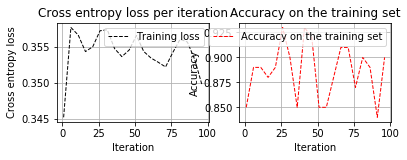

117

Session closed!


In [31]:
print("Evaluating deep MLP on the test set...")
#------------------------------------------------------------------------------
# Testing

test_acc = sess.run(accuracy, feed_dict={X: data_test, y: labels_test, dropout_keep_prob:1.})
print ("Prediction/clasification accuracy: %.3f" % (test_acc))


# Plot loss over time
plt.subplot(221)
plt.plot(i_data, cost_list, 'k--', label='Training loss', linewidth=1.0)
plt.title('Cross entropy loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Cross entropy loss')
plt.legend(loc='upper right')
plt.grid(True)

with open("i_data.txt", "w") as output:
    output.write(str(i_data))

with open("cost_list.txt", "w") as output:
    output.write(str(cost_list))

# Plot train and test accuracy
plt.subplot(222)
plt.plot(i_data, acc_list, 'r--', label='Accuracy on the training set', linewidth=1.0)
plt.title('Accuracy on the training set')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

with open("acc_list.txt", "w") as output:
    output.write(str(acc_list))

sess.close()
print("Session closed!")